# Expedia Analytics Assignment EDA
Jacob Marlow

### Definitions

**Week**	
The year and week that the booking took place. 2016-W45 is the week beginning 07/11/2016

**Platform**  
Type of device used to make the booking - Desktop computer, Mobile App (on a Smartphone or Tablet device), or our Mobile website (on a Smartphone or Tablet device)

**Super Region**	
The region that the traveler originates from (North America, Asia-Pacific, Europe Middle East & Africa or Latin America)

**Country Name**	
The country that the traveler originates from

**Booking Window Group**	
Refers to the number of days between the customer booking and checking into the hotel. E.g. if a customer booked a trip on January 1st and checked in on January 10th, the booking window would be 9 days

**Property Country**	
The country in which the booked hotel is located

**Net Gross Booking Value USD**	
The total $ amount that customers pay to Hotels.com for their hotel reservation. The value of cancelled bookings is removed

**Net Orders**  
The total number of hotel bookings made - the number of bookings cancelled

In [372]:
#import modules
import matplotlib.pyplot as plt
import pandas as pd
import datetime
import plotly
import plotly.express as px
import seaborn as sns
sns.set(style="darkgrid")


In [373]:
# Load dataset from xlsx file, 'Data' sheet only
dataset = pd.read_excel (r'/Users/jacobmarlow/Desktop/Assignment_Analytics_Graduate.xlsx',
                    sheet_name='Data') 

# Take a look
dataset.head()

,Week,Mobile Indicator Name,Platform Type Name,Super Region,Country Name,Booking Window Group,Property Country,Net Gross Booking Value USD,Net Orders
0,2016-W45,Desktop,Desktop,APAC,South Korea,8-14 days,Algeria,-608.4244,-3
1,2016-W45,Desktop,Desktop,APAC,South Korea,+90 days,Andorra,-512.1796,-2
2,2016-W45,Desktop,Desktop,APAC,South Korea,46-60 days,Andorra,103.4298,1
3,2016-W45,Desktop,Desktop,APAC,Australia,31-45 days,Argentina,395.9592,1
4,2016-W45,Desktop,Desktop,APAC,Australia,15-30 days,Argentina,373.4194,1


### Split Week to Datetime, Week No. and Year

In [374]:
datetime_list = []
week_list = []
year_list = []

for row, info in dataset.iterrows():
    datetime_element = datetime.datetime.strptime(dataset['Week'][row] + '-D1', "%Y-W%W-D%w")
    datetime_list.append(datetime_element)
    week_list.append(datetime_element.strftime("%V"))
    year_list.append(datetime_element.strftime("%Y"))

dataset['datetime'] = datetime_list
dataset['Week No'] = week_list
dataset['Year'] = year_list

dataset.head()

,Week,Mobile Indicator Name,Platform Type Name,Super Region,Country Name,Booking Window Group,Property Country,Net Gross Booking Value USD,Net Orders,datetime,Week No,Year
0,2016-W45,Desktop,Desktop,APAC,South Korea,8-14 days,Algeria,-608.4244,-3,2016-11-07,45,2016
1,2016-W45,Desktop,Desktop,APAC,South Korea,+90 days,Andorra,-512.1796,-2,2016-11-07,45,2016
2,2016-W45,Desktop,Desktop,APAC,South Korea,46-60 days,Andorra,103.4298,1,2016-11-07,45,2016
3,2016-W45,Desktop,Desktop,APAC,Australia,31-45 days,Argentina,395.9592,1,2016-11-07,45,2016
4,2016-W45,Desktop,Desktop,APAC,Australia,15-30 days,Argentina,373.4194,1,2016-11-07,45,2016


See what time series we have

In [375]:
dataset.groupby('Week').size()

Week
2016-W45     8404
2016-W46     8536
2016-W47     8369
2016-W48     8381
2017-W45    10156
2017-W46    10154
2017-W47     9769
2017-W48     9919
dtype: int64

### Check record entries

In [18]:
columnname_list = list(dataset)

for name in columnname_list:
    print(name)
    print(dataset.groupby(name).size().values.sum())

Week
73688
Mobile Indicator Name
73688
Platform Type Name
73688
Super Region
53423
Country Name
73688
Booking Window Group
73688
Property Country
73688
Net Gross Booking Value USD
73688
Net Orders
73688
datetime
73688
Week No
73688
Year
73688


In [376]:
# Take a look why
# The region that the traveler originates from 
# (!!North America!!!, Asia-Pacific, Europe Middle East & Africa or Latin America)
# APAC = Asia-Pacific
# EMEA = Europe
# LATAM = Latin America

dataset.groupby('Super Region').size()

Super Region
APAC     23805
EMEA     23477
LATAM     6141
dtype: int64

In [377]:
# See miscount after review (total lines = 73688)
# After reviewing data NA picked up as nan maybe or just no values
dataset['Super Region'] = dataset['Super Region'].replace(to_replace=float('nan'), value='NA', method='pad')

print(dataset.groupby('Super Region').size())
print(dataset.groupby('Super Region').size().sum())

Super Region
APAC     23805
EMEA     23477
LATAM     6141
NA       20265
dtype: int64
73688


### Check for outliers

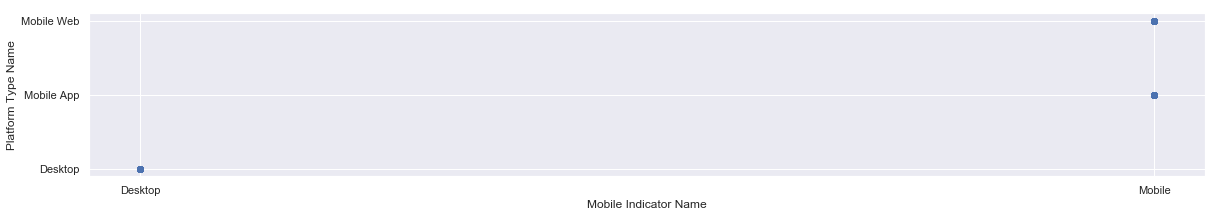

In [378]:
# Indicator name should match platform
# Plot
plt.scatter(dataset['Mobile Indicator Name'].values, dataset['Platform Type Name'].values)
plt.xlabel('Mobile Indicator Name')
plt.ylabel('Platform Type Name')
plt.show()

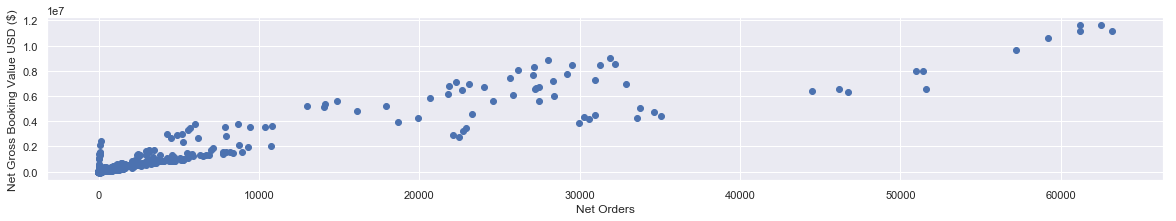

In [379]:
# Number of orders should be approx. proportional to value
plt.scatter(dataset['Net Orders'].values, dataset['Net Gross Booking Value USD'].values)
plt.ylabel('Net Gross Booking Value USD ($)')
plt.xlabel('Net Orders')
plt.show()

/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.



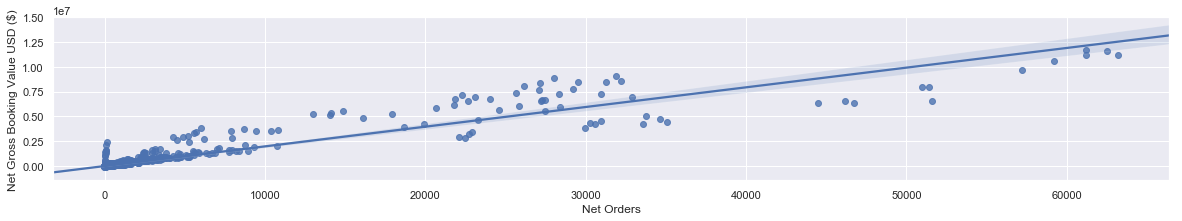

In [380]:

sns.regplot(dataset['Net Orders'].values, dataset['Net Gross Booking Value USD'].values)
plt.ylabel('Net Gross Booking Value USD ($)')
plt.xlabel('Net Orders')
plt.show()

## Create new 2017 & 2016 datasets

In [381]:
dataset_2016 = dataset[dataset['Year']=='2016']
dataset_2017 = dataset[dataset['Year']=='2017']

In [382]:
weekly_2016_orders = dataset_2016.groupby(['Week No'])['Net Orders'].sum()
weekly_2017_orders = dataset_2017.groupby(['Week No'])['Net Orders'].sum()

print(weekly_2016_orders)
print(weekly_2017_orders)

Week No
45    404385
46    413323
47    373690
48    344899
Name: Net Orders, dtype: int64
Week No
45    524028
46    519657
47    501328
48    452369
Name: Net Orders, dtype: int64


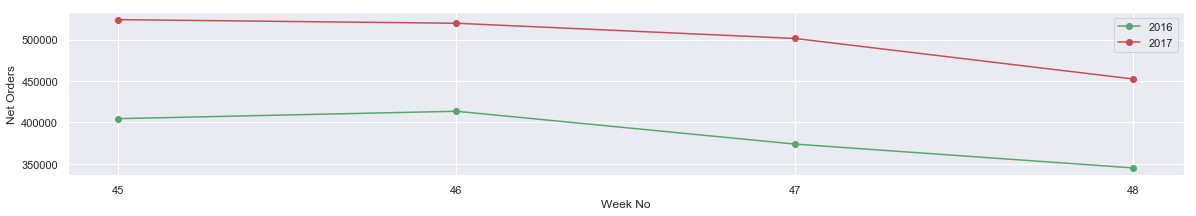

In [383]:
plt.plot(weekly_2016_orders.index, weekly_2016_orders.values,'-o' ,c='g',label='2016')
plt.plot(weekly_2017_orders.index, weekly_2017_orders.values,'-o' ,c='r',label='2017')
plt.xlabel('Week No')
plt.ylabel('Net Orders')
plt.legend()
plt.show()

In [384]:
weekly_2016_value = dataset_2016.groupby(['Week No'])['Net Gross Booking Value USD'].sum()
weekly_2017_value = dataset_2017.groupby(['Week No'])['Net Gross Booking Value USD'].sum()

print(weekly_2016_value)
print(weekly_2017_value)

Week No
45    1.273156e+08
46    1.145817e+08
47    9.923008e+07
48    9.090130e+07
Name: Net Gross Booking Value USD, dtype: float64
Week No
45    1.376031e+08
46    1.353709e+08
47    1.228146e+08
48    1.112352e+08
Name: Net Gross Booking Value USD, dtype: float64


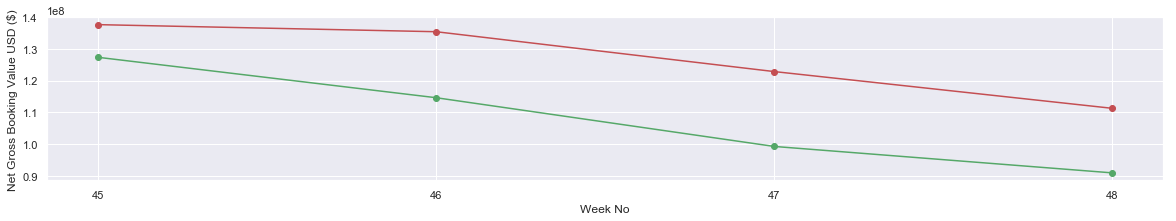

In [385]:
plt.plot(weekly_2016_value.index, weekly_2016_value.values,'-o' ,c='g',label='2016')
plt.plot(weekly_2017_value.index, weekly_2017_value.values,'-o' ,c='r',label='2017')
plt.xlabel('Week No')
plt.ylabel('Net Gross Booking Value USD ($)')
plt.show()

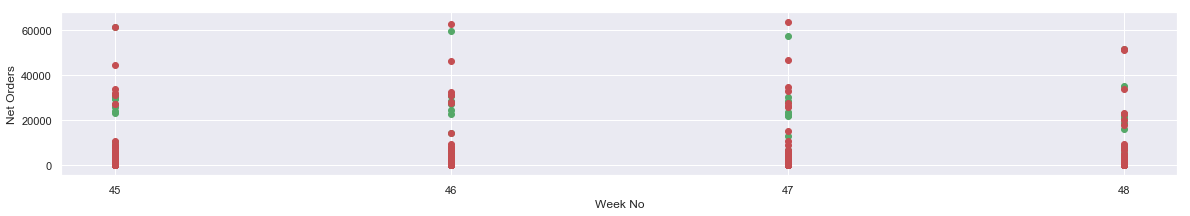

In [386]:
plt.scatter(dataset_2016['Week No'].values, dataset_2016['Net Orders'].values,c='g')
plt.scatter(dataset_2017['Week No'].values, dataset_2017['Net Orders'].values,c='r')
plt.xlabel('Week No')
plt.ylabel('Net Orders')
plt.show()

In [387]:
dataset_2016.groupby('Week').size()

Week
2016-W45    8404
2016-W46    8536
2016-W47    8369
2016-W48    8381
dtype: int64

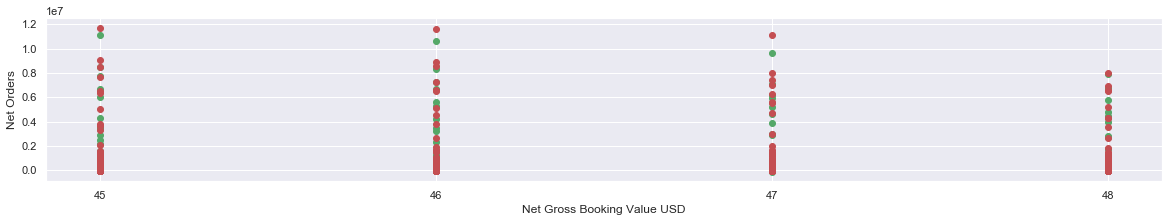

In [388]:
plt.scatter(dataset_2016['Week No'], dataset_2016['Net Gross Booking Value USD'].values,c='g')
plt.scatter(dataset_2017['Week No'], dataset_2017['Net Gross Booking Value USD'].values,c='r')
plt.xlabel('Net Gross Booking Value USD')
plt.ylabel('Net Orders')
plt.show()

### Look by platform

In [389]:
dataset.groupby(['Platform Type Name','Year']).sum()

Net Gross Booking Value USD  Net Orders
Platform Type Name Year                                         
Desktop            2016                 3.202647e+08     1066185
                   2017                 3.490814e+08     1211274
Mobile App         2016                 5.119279e+07      183998
                   2017                 6.641644e+07      332541
Mobile Web         2016                 6.057117e+07      286114
                   2017                 9.152601e+07      453567

Text(0,0.5,'Net Orders')

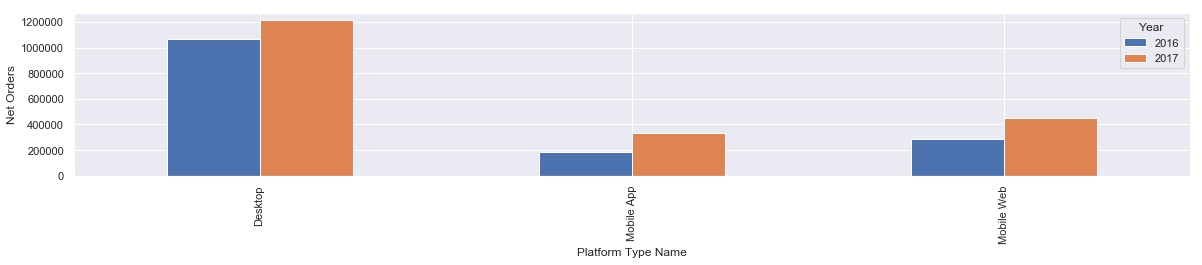

In [390]:
platform_year = dataset.groupby(['Platform Type Name','Year'])['Net Orders'].sum()
ax = platform_year.unstack().plot(kind='bar')
ax.set_ylabel("Net Orders")

(0, 100)

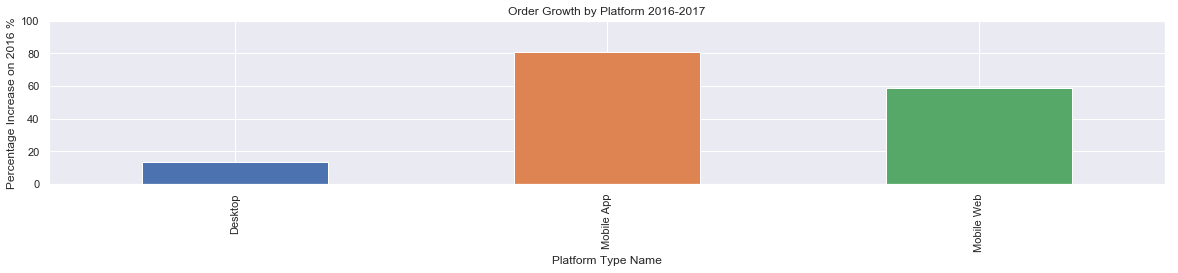

In [391]:
growth_plaform_percentage = ((dataset_2017.groupby(['Platform Type Name'])['Net Orders'].sum()\
-dataset_2016.groupby(['Platform Type Name'])['Net Orders'].sum())\
/dataset_2016.groupby(['Platform Type Name'])['Net Orders'].sum())*100

ax = growth_plaform_percentage.plot(kind='bar')
ax.set_ylabel("Percentage Increase on 2016 %")
ax.set_title("Order Growth by Platform 2016-2017")
ax.set_ylim(0,100)

In [392]:
dataset_2017.groupby(['Platform Type Name'])['Net Gross Booking Value USD'].sum()-dataset_2016.groupby(['Platform Type Name'])['Net Gross Booking Value USD'].sum()

Platform Type Name
Desktop       2.881676e+07
Mobile App    1.522365e+07
Mobile Web    3.095484e+07
Name: Net Gross Booking Value USD, dtype: float64

In [393]:
platform_year = dataset.groupby('Platform Type Name')['Net Orders'].sum()
data = platform_year
print(data)

Platform Type Name
Desktop       2277459
Mobile App     516539
Mobile Web     739681
Name: Net Orders, dtype: int64


Text(0,0.5,'Net Gross Booking Value USD ($)')

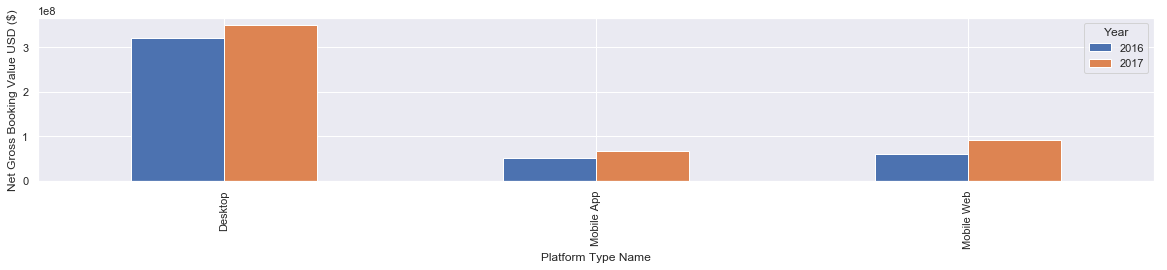

In [394]:
platform_year = dataset.groupby(['Platform Type Name','Year'])['Net Gross Booking Value USD'].sum()
ax = platform_year.unstack().plot(kind='bar')
ax.set_ylabel('Net Gross Booking Value USD ($)')

(0, 100)

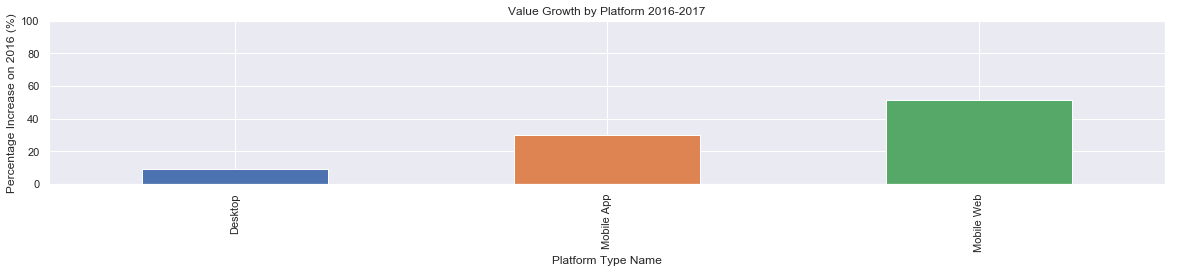

In [395]:
growth_plaform_percentage = ((dataset_2017.groupby(['Platform Type Name'])['Net Gross Booking Value USD'].sum()\
-dataset_2016.groupby(['Platform Type Name'])['Net Gross Booking Value USD'].sum())\
/dataset_2016.groupby(['Platform Type Name'])['Net Gross Booking Value USD'].sum())*100

ax = growth_plaform_percentage.plot(kind='bar')
ax.set_ylabel("Percentage Increase on 2016 (%)")
ax.set_title("Value Growth by Platform 2016-2017")
ax.set_ylim(0,100)

Text(0,0.5,'Net Gross Booking Value USD')

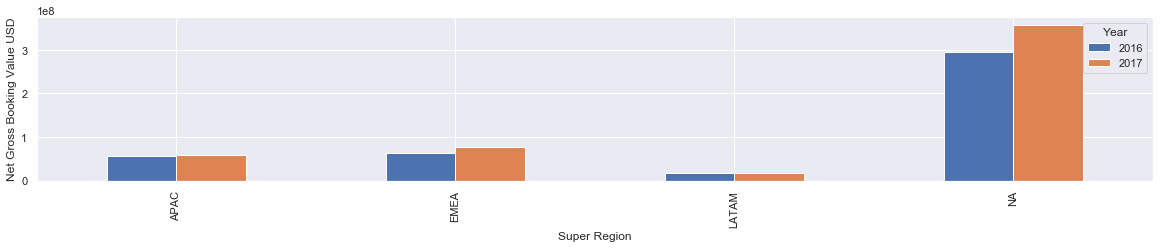

In [396]:
platform_year = dataset.groupby(['Super Region', 'Year'])['Net Gross Booking Value USD'].sum()
ax = platform_year.unstack().plot(kind='bar')
ax.set_ylabel('Net Gross Booking Value USD')

In [397]:
#platform_year = 
NA_platformyear = dataset.groupby(['Super Region','Platform Type Name','Year'])['Net Gross Booking Value USD'].sum()['NA']
dataset.groupby(['Super Region','Platform Type Name','Year'])['Net Gross Booking Value USD'].sum()['NA']

Platform Type Name  Year
Desktop             2016    2.249943e+08
                    2017    2.440365e+08
Mobile App          2016    2.645716e+07
                    2017    4.501073e+07
Mobile Web          2016    4.418621e+07
                    2017    6.737063e+07
Name: Net Gross Booking Value USD, dtype: float64

Text(0.5,1,'Breakdown of Bookings in NA by Platform')

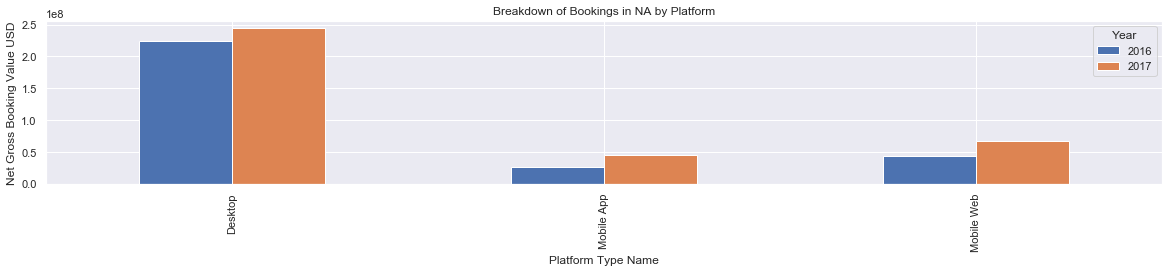

In [398]:
ax = NA_platformyear.unstack().plot(kind='bar')
ax.set_ylabel('Net Gross Booking Value USD')
ax.set_title('Breakdown of Bookings in NA by Platform')

## Super region by boooking window

Text(0,0.5,'Net Gross Booking Value USD')

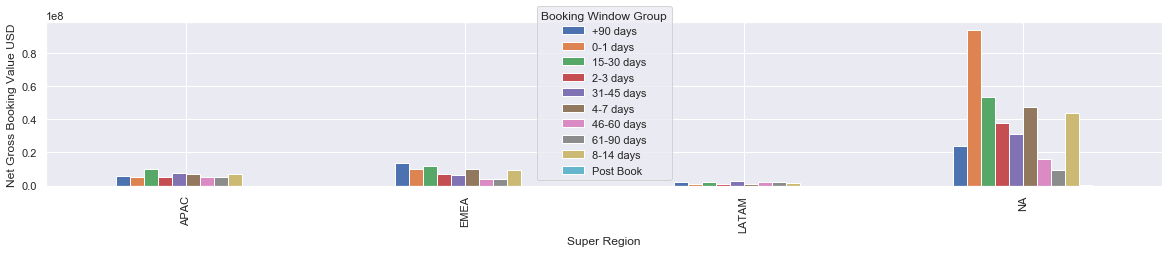

In [400]:
platform_year = dataset_2017.groupby(['Super Region','Booking Window Group'])['Net Gross Booking Value USD'].sum()
plt.rcParams["figure.figsize"] = (20,3)
ax = platform_year.unstack().plot(kind='bar')
ax.set_ylabel("Net Gross Booking Value USD")

In [401]:
dataset_2016.groupby(['Super Region','Booking Window Group'])['Net Gross Booking Value USD'].sum()

Super Region  Booking Window Group
APAC          +90 days                6.055169e+06
              0-1 days                5.759152e+06
              15-30 days              9.257172e+06
              2-3 days                5.506608e+06
              31-45 days              7.305313e+06
              4-7 days                6.384527e+06
              46-60 days              5.510081e+06
              61-90 days              4.707076e+06
              8-14 days               6.582687e+06
EMEA          +90 days                1.065714e+07
              0-1 days                7.705011e+06
              15-30 days              9.945605e+06
              2-3 days                5.551519e+06
              31-45 days              5.938401e+06
              4-7 days                8.268308e+06
              46-60 days              3.307409e+06
              61-90 days              3.758635e+06
              8-14 days               7.688294e+06
LATAM         +90 days                2.367592e

In [402]:
dataset_2017.groupby(['Super Region','Booking Window Group'])['Net Gross Booking Value USD'].sum()

Super Region  Booking Window Group
APAC          +90 days                5.803620e+06
              0-1 days                5.012757e+06
              15-30 days              9.718708e+06
              2-3 days                5.002137e+06
              31-45 days              7.769238e+06
              4-7 days                6.920988e+06
              46-60 days              5.248672e+06
              61-90 days              5.005229e+06
              8-14 days               7.175297e+06
              Post Book               2.125394e+02
EMEA          +90 days                1.344853e+07
              0-1 days                1.014722e+07
              15-30 days              1.186622e+07
              2-3 days                6.869377e+06
              31-45 days              6.586343e+06
              4-7 days                1.027319e+07
              46-60 days              3.866856e+06
              61-90 days              4.146070e+06
              8-14 days               9.428927e

In [403]:
booking_group_diff = dataset_2017.groupby(['Super Region','Booking Window Group'])['Net Gross Booking Value USD'].sum()\
- dataset_2016.groupby(['Super Region','Booking Window Group'])['Net Gross Booking Value USD'].sum()

Text(0.5,1,'Growth in Booking Windows by Super Region')

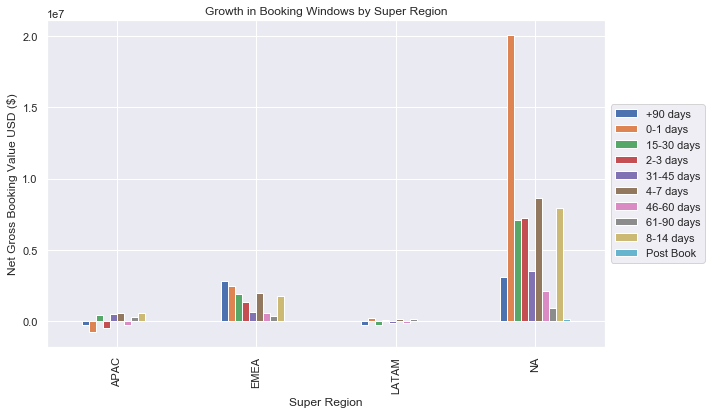

In [404]:

plt.rcParams["figure.figsize"] = (10,6)
ax = booking_group_diff.unstack().plot(kind='bar')
ax.set_ylabel("Net Gross Booking Value USD ($)")
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
ax.set_title('Growth in Booking Windows by Super Region')

## platform by super region

Text(0.5,1,'Platform Growth 2016-2017 by Super Region')

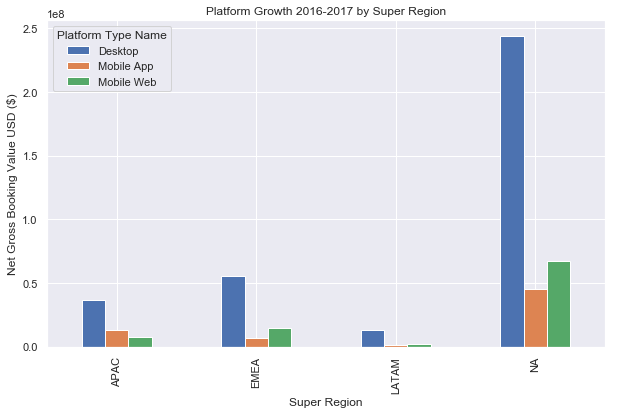

In [405]:
ax = dataset_2017.groupby(['Super Region','Platform Type Name'])['Net Gross Booking Value USD'].sum().unstack().plot(kind='bar')
ax.set_ylabel("Net Gross Booking Value USD ($)")
ax.set_title('Platform Growth 2016-2017 by Super Region')


Text(0.5,1,'Platform Growth 2016-2017 by Super Region')

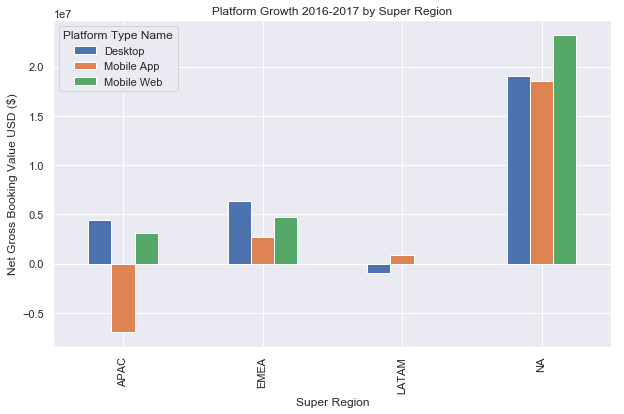

In [406]:
SR_PT_diff = dataset_2017.groupby(['Super Region','Platform Type Name'])['Net Gross Booking Value USD'].sum()\
- dataset_2016.groupby(['Super Region','Platform Type Name'])['Net Gross Booking Value USD'].sum()


ax = SR_PT_diff.unstack().plot(kind='bar')
ax.set_ylabel("Net Gross Booking Value USD ($)")
ax.set_title('Platform Growth 2016-2017 by Super Region')


Text(0.5,1,'Platform Growth 2016-2017 by Super Region')

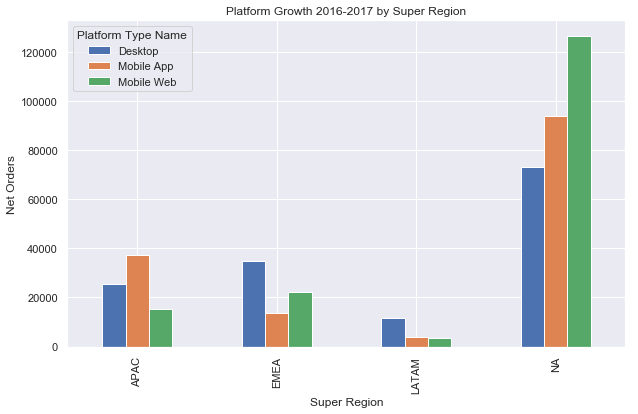

In [407]:
SR_PT_diff = dataset_2017.groupby(['Super Region','Platform Type Name'])['Net Orders'].sum()\
- dataset_2016.groupby(['Super Region','Platform Type Name'])['Net Orders'].sum()


ax = SR_PT_diff.unstack().plot(kind='bar')
ax.set_ylabel("Net Orders")
ax.set_title('Platform Growth 2016-2017 by Super Region')


### Most Popular Destination

#### By Value

Text(0.5,1,'Top 10 Destinations 2017')

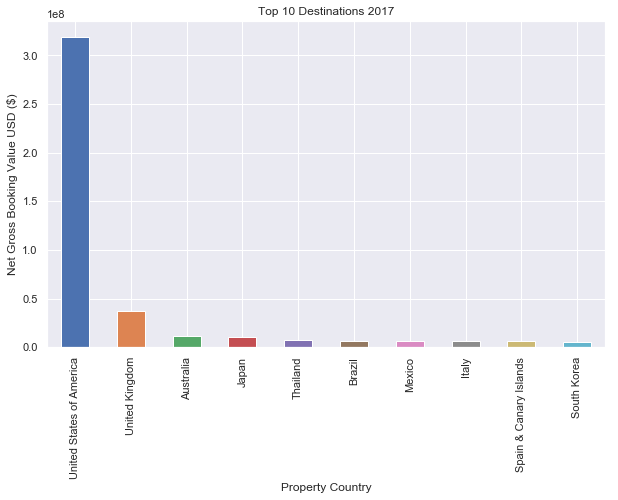

In [408]:
top_ten_net_value_2017 = dataset_2017.groupby(['Property Country'])['Net Gross Booking Value USD'].sum().nlargest(10)

ax = top_ten_net_value_2017.plot(kind='bar')
ax.set_ylabel("Net Gross Booking Value USD ($)")
ax.set_title('Top 10 Destinations 2017')

In [409]:
US_data = dataset[dataset['Country Name']=='US']

In [410]:
US_data.groupby(['Year','Platform Type Name'])['Net Gross Booking Value USD'].sum()

Year  Platform Type Name
2016  Desktop               2.249943e+08
      Mobile App            2.645716e+07
      Mobile Web            4.418621e+07
2017  Desktop               2.440365e+08
      Mobile App            4.501073e+07
      Mobile Web            6.737063e+07
Name: Net Gross Booking Value USD, dtype: float64

Text(0,0.5,'US Net Order Breakdown')

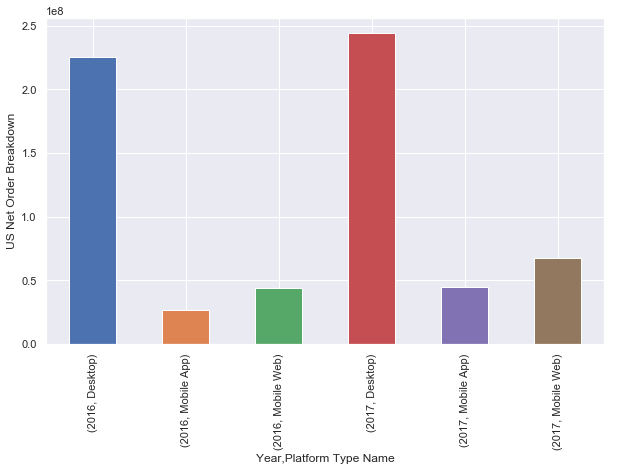

In [412]:
US_Data_by_platform = US_data.groupby(['Year','Platform Type Name'])['Net Gross Booking Value USD'].sum()
ax = US_Data_by_platform.plot(kind='bar')
ax.set_ylabel('US Net Order Breakdown')


#### By Orders

Text(0.5,1,'Top 10 Booked Property Countries')

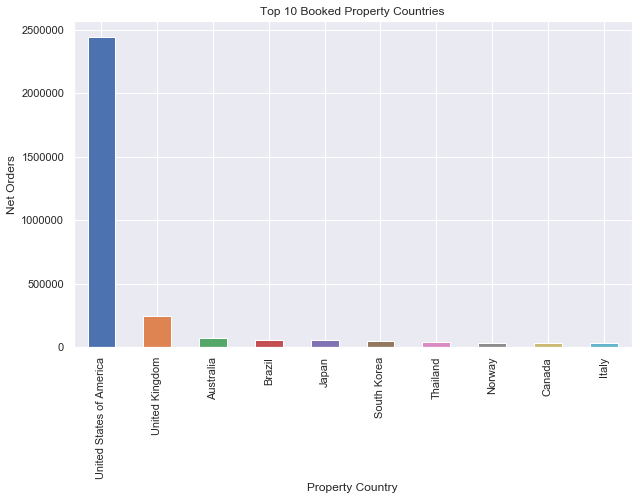

In [413]:
top_ten_net_order = dataset.groupby(['Property Country'])['Net Orders'].sum().nlargest(10)

ax = top_ten_net_order.plot(kind='bar')
ax.set_ylabel('Net Orders')
ax.set_title('Top 10 Booked Property Countries')

### Growth

In [414]:
destination_growth = dataset_2017.groupby(['Property Country'])['Net Gross Booking Value USD'].sum()\
- dataset_2016.groupby(['Property Country'])['Net Gross Booking Value USD'].sum()

destination_growth_by_order = dataset_2017.groupby(['Property Country'])['Net Orders'].sum()\
- dataset_2016.groupby(['Property Country'])['Net Orders'].sum()

In [415]:
top_10_destination_growth = destination_growth.nlargest(10)
destination_growth.nlargest(10)

Property Country
United States of America     5.631833e+07
United Kingdom               8.780061e+06
Japan                        4.687278e+06
Thailand                     1.955228e+06
Spain & Canary Islands       1.835812e+06
South Korea                  1.792183e+06
Taiwan, Republic of China    1.256133e+06
Hong Kong                    1.154137e+06
Guam                         1.099570e+06
China                        9.383270e+05
Name: Net Gross Booking Value USD, dtype: float64

In [416]:
top_10_destination_growth_by_order = destination_growth_by_order.nlargest(10)
destination_growth.nlargest(10)

Property Country
United States of America     5.631833e+07
United Kingdom               8.780061e+06
Japan                        4.687278e+06
Thailand                     1.955228e+06
Spain & Canary Islands       1.835812e+06
South Korea                  1.792183e+06
Taiwan, Republic of China    1.256133e+06
Hong Kong                    1.154137e+06
Guam                         1.099570e+06
China                        9.383270e+05
Name: Net Gross Booking Value USD, dtype: float64

Text(0.5,1,'Top 10 On-the-Rise Destinations 2016-2017')

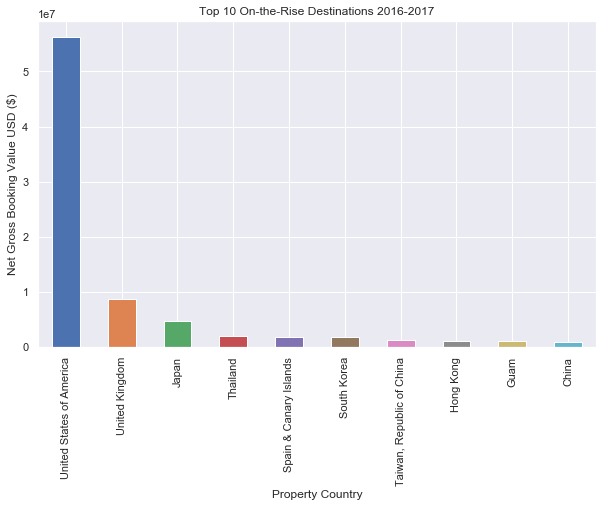

In [417]:
ax = top_10_destination_growth.plot(kind='bar')
ax.set_ylabel('Net Gross Booking Value USD ($)')
ax.set_title('Top 10 On-the-Rise Destinations 2016-2017')

Text(0.5,1,'Top 10 On-the-Rise Destinations 2016-2017')

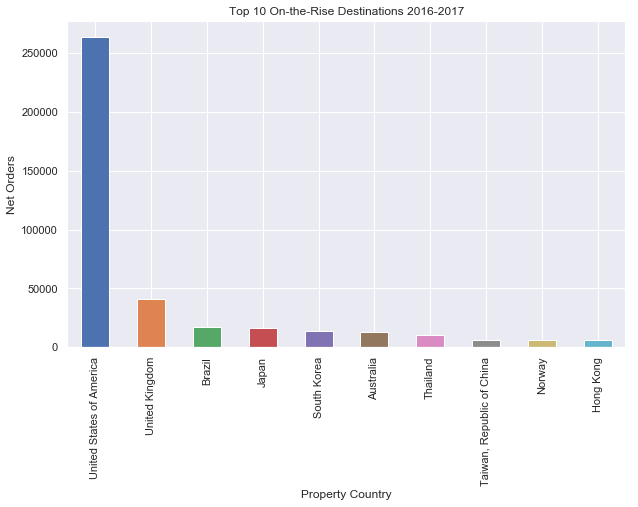

In [418]:
ax = top_10_destination_growth_by_order.plot(kind='bar')
ax.set_ylabel('Net Orders')
ax.set_title('Top 10 On-the-Rise Destinations 2016-2017')

## Refunds

In [419]:
refunds = dataset[dataset['Net Gross Booking Value USD']<0]


In [420]:
refunds.head()

,Week,Mobile Indicator Name,Platform Type Name,Super Region,Country Name,Booking Window Group,Property Country,Net Gross Booking Value USD,Net Orders,datetime,Week No,Year
0,2016-W45,Desktop,Desktop,APAC,South Korea,8-14 days,Algeria,-608.4244,-3,2016-11-07,45,2016
1,2016-W45,Desktop,Desktop,APAC,South Korea,+90 days,Andorra,-512.1796,-2,2016-11-07,45,2016
59,2016-W45,Desktop,Desktop,APAC,South Korea,31-45 days,Austria,-1001.3268,0,2016-11-07,45,2016
63,2016-W45,Desktop,Desktop,APAC,Australia,2-3 days,Azerbaijan,-0.0001,0,2016-11-07,45,2016
64,2016-W45,Desktop,Desktop,APAC,South Korea,8-14 days,Azerbaijan,-574.1260,-1,2016-11-07,45,2016


In [421]:
refunds.groupby(['Country Name','Platform Type Name'])['Net Orders'].sum()


Country Name    Platform Type Name
Australia       Desktop                28
                Mobile App            -27
                Mobile Web            -55
Brazil          Desktop               -50
                Mobile App            -60
                Mobile Web            -82
Hong Kong       Desktop                62
                Mobile App            -81
                Mobile Web            -67
Norway          Desktop               -34
                Mobile App            -46
                Mobile Web            -36
South Korea     Desktop               -47
                Mobile App            -52
                Mobile Web            -77
US              Desktop               791
                Mobile App             55
                Mobile Web            -97
United Kingdom  Desktop              -135
                Mobile App           -102
                Mobile Web            -83
Name: Net Orders, dtype: int64

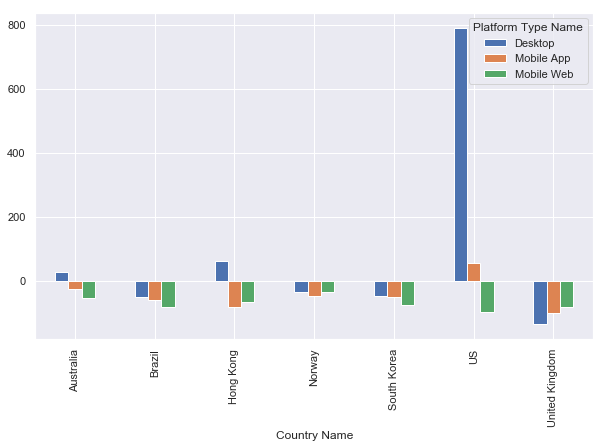

In [422]:
refunds.groupby(['Country Name','Platform Type Name'])['Net Orders'].sum().unstack().plot(kind='bar')

Text(0,0.5,'Net Gross Booking Value (USD, $)')

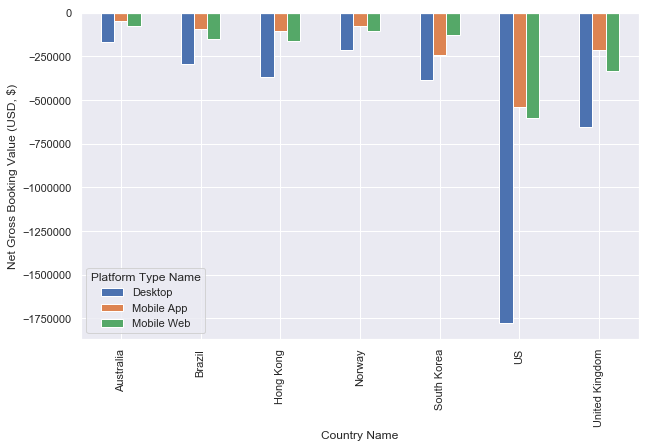

In [423]:
ax = refunds.groupby(['Country Name','Platform Type Name'])['Net Gross Booking Value USD'].sum().unstack().plot(kind='bar')
ax.set_ylabel("Net Gross Booking Value (USD, $)")

Text(0,0.5,'Net Gross Booking Value (USD, $)')

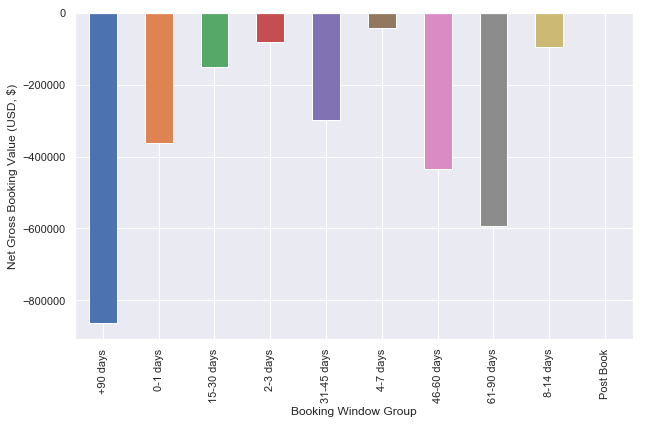

In [424]:
ax = refunds.groupby(['Country Name','Booking Window Group'])['Net Gross Booking Value USD'].sum()['US'].plot(kind='bar')
ax.set_ylabel("Net Gross Booking Value (USD, $)")

### Booking window by platform

Text(0,0.5,'Net Gross Booking Value (USD, $)')

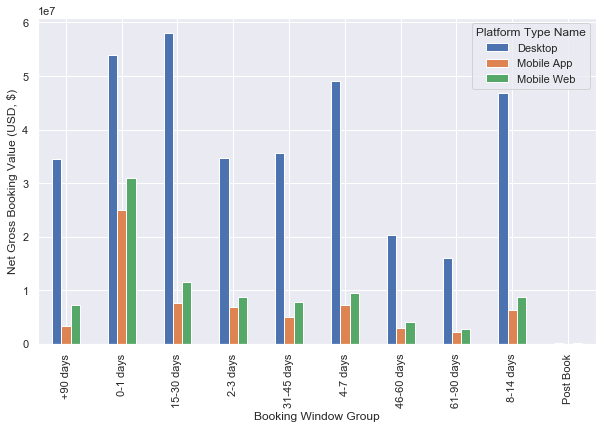

In [426]:
ax = dataset_2017.groupby(['Booking Window Group','Platform Type Name'])['Net Gross Booking Value USD'].sum().unstack().plot(kind='bar')
ax.set_ylabel("Net Gross Booking Value (USD, $)")